In [1]:
%matplotlib inline

In [20]:
path = "data/data/dogscats/sample/"

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using TensorFlow backend.


In [5]:
batch_size = 64

In [6]:
import vgg16;
reload(vgg16)

<module 'vgg16' from 'vgg16.pyc'>

In [7]:
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()

In [21]:
batches = vgg.get_batches(path + 'train', batch_size = batch_size)

Found 16 images belonging to 2 classes.


In [25]:
imgs,labels = next(batches)

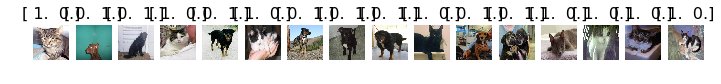

In [29]:
plots(imgs,titles = labels)

In [30]:
vgg.predict(imgs,True)

(array([ 0.7598,  0.9257,  0.6564,  0.7921,  0.6522,  0.7898,  0.6451,  0.9826,  0.9539,  0.5995,
         0.9446,  0.9483,  0.8315,  0.936 ,  0.8609,  0.8028], dtype=float32),
 array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]),
 ['dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  'dogs',
  'cats',
  'cats',
  'cats',
  'cats',
  'dogs',
  'dogs',
  'cats',
  'dogs'])

In [31]:
vgg.classes[:4]

['cats', 'dogs']

In [22]:
val_batches = vgg.get_batches(path+'valid',batch_size= batch_size * 2)

Found 8 images belonging to 2 classes.


In [23]:
vgg.finetune(batches)

In [24]:
vgg.fit(batches,val_batches,nb_epoch = 1)

Epoch 1/1
16/16 [==============================] - 11s - loss: 1.4655 - acc: 0.5625 - val_loss: 1.4400 - val_acc: 0.2500


In [32]:
from numpy.random import random, permutation

In [33]:
from scipy import misc,ndimage

In [34]:
from scipy.ndimage.interpolation import zoom

In [35]:
import keras

In [36]:
from keras import backend as K

In [37]:
from keras.utils.data_utils import get_file

In [38]:
from keras.models import Sequential, Model

In [39]:
from keras.layers.core import Flatten,Dense,Dropout,Lambda

In [40]:
from keras.layers import Input

In [41]:
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D

In [42]:
from keras.optimizers import SGD,RMSprop

In [43]:
from keras.preprocessing import image

In [44]:
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'

In [45]:
fpath = get_file(CLASS_FILE,FILES_PATH+CLASS_FILE,cache_subdir = "models")

In [46]:
with open(fpath) as f:
    class_dict = json.load(f)

In [48]:
print (class_dict)

{u'344': [u'n02398521', u'hippopotamus'], u'0': [u'n01440764', u'tench'], u'346': [u'n02408429', u'water_buffalo'], u'347': [u'n02410509', u'bison'], u'340': [u'n02391049', u'zebra'], u'341': [u'n02395406', u'hog'], u'342': [u'n02396427', u'wild_boar'], u'343': [u'n02397096', u'warthog'], u'810': [u'n04264628', u'space_bar'], u'811': [u'n04265275', u'space_heater'], u'812': [u'n04266014', u'space_shuttle'], u'813': [u'n04270147', u'spatula'], u'348': [u'n02412080', u'ram'], u'349': [u'n02415577', u'bighorn'], u'816': [u'n04277352', u'spindle'], u'817': [u'n04285008', u'sports_car'], u'595': [u'n03496892', u'harvester'], u'719': [u'n03935335', u'piggy_bank'], u'718': [u'n03933933', u'pier'], u'717': [u'n03930630', u'pickup'], u'716': [u'n03930313', u'picket_fence'], u'715': [u'n03929855', u'pickelhaube'], u'714': [u'n03929660', u'pick'], u'713': [u'n03924679', u'photocopier'], u'712': [u'n03920288', u'Petri_dish'], u'711': [u'n03916031', u'perfume'], u'710': [u'n03908714', u'pencil_shar

In [51]:
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [53]:
classes[:15]

[u'tench',
 u'goldfish',
 u'great_white_shark',
 u'tiger_shark',
 u'hammerhead',
 u'electric_ray',
 u'stingray',
 u'cock',
 u'hen',
 u'ostrich',
 u'brambling',
 u'goldfinch',
 u'house_finch',
 u'junco',
 u'indigo_bunting']

In [61]:
def ConvBlock(layers,model,filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters,3,3,activation="relu"))
    model.add(MaxPooling2D((2,2),strides=(2,2)))

In [62]:
def FCBlock(model):
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))

In [63]:
vgg_mean = np.array([123.68,116.779, 103.939]).reshape((3,1,1))

In [64]:
def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:,::-1]

In [65]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess,input_shape=(3,224,224)))
    
    ConvBlock(2,model,64)
    ConvBlock(2,model, 128)
    ConvBlock(3,model, 256)
    ConvBlock(3 ,model, 512)
    ConvBlock(3 ,model, 512)
    
    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000,activation= 'softmax'))
    return model
    

In [66]:
model = VGG_16()

In [67]:
fpath = get_file('vgg16.h5',FILES_PATH+'vgg16.h5',cache_subdir = 'models')

In [68]:
model.load_weights(fpath)

In [69]:
batch_size = 64

In [70]:
def get_batches(dirname,gen=image.ImageDataGenerator(),shuffle = True,
               batch_size = batch_size , class_mode = 'categorical'):
    return gen.flow_from_directory(path+dirname, target_size = (224,224),
                                  class_mode = class_mode, shuffle = shuffle,batch_size = batch_size)

In [71]:
batches = get_batches('train',batch_size = batch_size)

Found 16 images belonging to 2 classes.


In [72]:
val_batches = get_batches('valid',batch_size=batch_size)

Found 8 images belonging to 2 classes.


In [73]:
imgs,labels = next(batches)

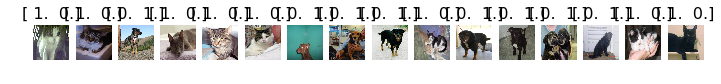

In [74]:
plots(imgs, titles = labels)

In [78]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds,axis = 1)
    
    print("Shape: {}",format(preds.shape))
    print("First 20 classes: {}".format(classes[:20]))
    print("First 20 probabilities: {}\n".format(preds[0,:20]))
    print("Predictions prob/class: ")
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print(" {:.4f}/{}".format(preds[i,idx],classes[idx]))

In [79]:
pred_batch(imgs)

Shape: {} (16, 1000)
First 20 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead', u'electric_ray', u'stingray', u'cock', u'hen', u'ostrich', u'brambling', u'goldfinch', u'house_finch', u'junco', u'indigo_bunting', u'robin', u'bulbul', u'jay', u'magpie', u'chickadee']
First 20 probabilities: [  9.2671e-06   4.4865e-06   1.6599e-04   1.6832e-05   3.0892e-05   1.4874e-05   5.7966e-05
   7.0360e-03   2.0065e-03   6.0911e-03   3.7166e-05   9.3393e-05   1.4983e-04   2.2478e-04
   5.5507e-05   8.3987e-05   1.3156e-04   7.8021e-03   9.5554e-05   1.0649e-03]

Predictions prob/class: 
 0.2375/llama
 0.6288/Persian_cat
 0.1351/English_springer
 0.6252/Weimaraner
 0.5232/tabby
 0.1420/plastic_bag
 0.1499/pool_table
 0.3322/Chihuahua
 0.0850/Airedale
 0.1573/badger
 0.1952/Gordon_setter
 0.1786/Boston_bull
 0.2458/toy_terrier
 0.4155/Scotch_terrier
 0.3318/marmoset
 0.0800/Egyptian_cat
